In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import statsmodels.tsa.stattools as stt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import scipy.stats as stats
import seaborn as sns
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [5]:
rcParams['figure.figsize'] = 17, 6

In [6]:
serie_temporal_2_df = pd.read_csv("serie2.csv")

In [7]:
serie_temporal_2_df

,COMPETENCIA,QT_TRC MWh
0,2021-01-01 00:00:00.000,38460.5665
1,2021-02-01 00:00:00.000,37036.8864
2,2021-03-01 00:00:00.000,41713.3178
3,2021-04-01 00:00:00.000,40067.1373
4,2021-05-01 00:00:00.000,35073.5331
5,2021-06-01 00:00:00.000,34366.7915
6,2021-07-01 00:00:00.000,35128.9696
7,2021-08-01 00:00:00.000,35678.0093
8,2021-09-01 00:00:00.000,33738.1695
9,2021-10-01 00:00:00.000,35771.7085


In [59]:
ano = 2021
mes = 1

for i in range(0, 41):
    if mes < 10:
        serie_temporal_2_df.loc[i, 'COMPETENCIA'] = pd.to_datetime(f'{ano}-0{mes}-01')
    else:
       serie_temporal_2_df.loc[i, 'COMPETENCIA'] = pd.to_datetime(f'{ano}-{mes}-01')
    

    if mes == 12:
        ano += 1
        mes = 0
    
    mes += 1

In [61]:
serie_temporal_2_df.head()

,COMPETENCIA,QT_TRC MWh
0,2021-01-01 00:00:00,38460.5665
1,2021-02-01 00:00:00,37036.8864
2,2021-03-01 00:00:00,41713.3178
3,2021-04-01 00:00:00,40067.1373
4,2021-05-01 00:00:00,35073.5331


In [63]:
serie_temporal_2_series = pd.Series(serie_temporal_2_df['QT_TRC MWh'].values, index=serie_temporal_2_df['COMPETENCIA'].values)
serie_temporal_2_series

2021-01-01    38460.5665
2021-02-01    37036.8864
2021-03-01    41713.3178
2021-04-01    40067.1373
2021-05-01    35073.5331
2021-06-01    34366.7915
2021-07-01    35128.9696
2021-08-01    35678.0093
2021-09-01    33738.1695
2021-10-01    35771.7085
2021-11-01    50335.7193
2021-12-01    54764.8243
2022-01-01    54487.9410
2022-02-01    45045.5707
2022-03-01    40532.1935
2022-04-01    34881.4412
2022-05-01    36241.4403
2022-06-01    34174.4342
2022-07-01    33086.0027
2022-08-01    32554.4121
2022-09-01    31712.0887
2022-10-01    33309.7990
2022-11-01    43777.5345
2022-12-01    51231.6494
2023-01-01    50688.2735
2023-02-01    42037.5662
2023-03-01    41511.7345
2023-04-01    35585.4195
2023-05-01    29377.0791
2023-06-01    27936.8808
2023-07-01    28237.9317
2023-08-01    27190.1552
2023-09-01    25829.4101
2023-10-01    26749.4618
2023-11-01    27276.3319
2023-12-01    29143.7524
2024-01-01    32363.7098
2024-02-01    39002.0652
2024-03-01    29565.7371
2024-04-01    31593.5115


In [11]:
serie_temp_2_2021 = serie_temporal_2_series[0:12]
serie_temp_2_2022 = serie_temporal_2_series[12:24]
serie_temp_2_2023 = serie_temporal_2_series[24:36]
serie_temp_2_2024 = serie_temporal_2_series[36:41]

In [12]:
index_so_meses = pd.Series()

for i in range(1, 13):
    if i < 10:
        index_so_meses[i-1] = f'0{i}'
    else:
        index_so_meses[i-1] = f'{i}'


serie_temp_2_2021.index = index_so_meses
serie_temp_2_2022.index = index_so_meses
serie_temp_2_2023.index = index_so_meses
serie_temp_2_2024.index = index_so_meses[0:5]

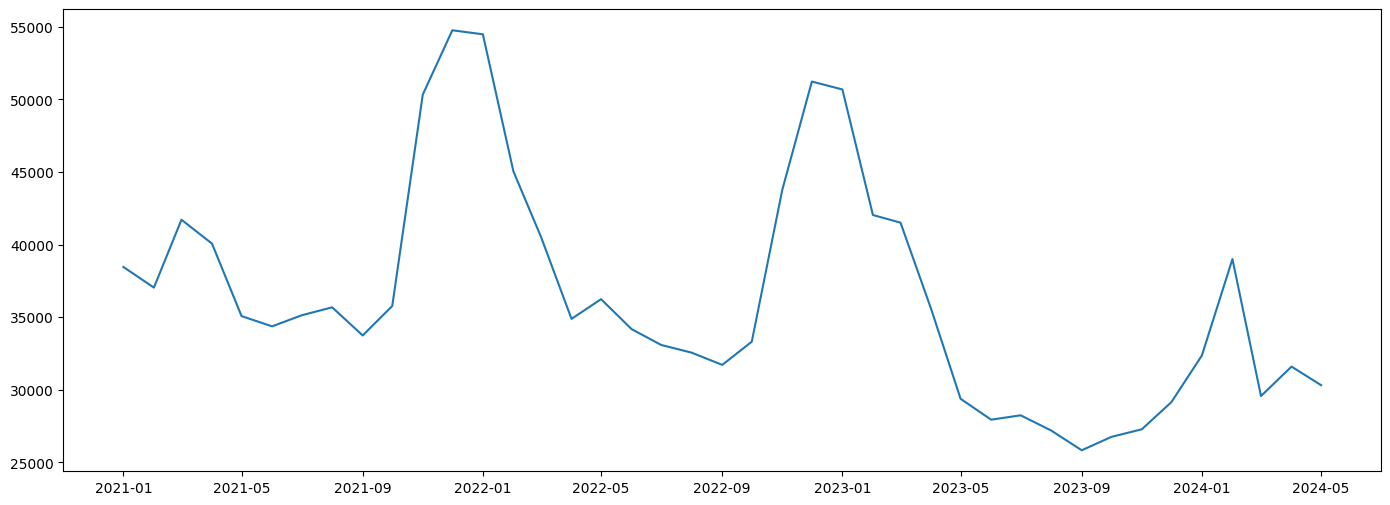

In [13]:
plt.plot(serie_temporal_2_df['COMPETENCIA'], serie_temporal_2_df['QT_TRC MWh'])

Graficamente, é possível notar uma tendência de decrescimento

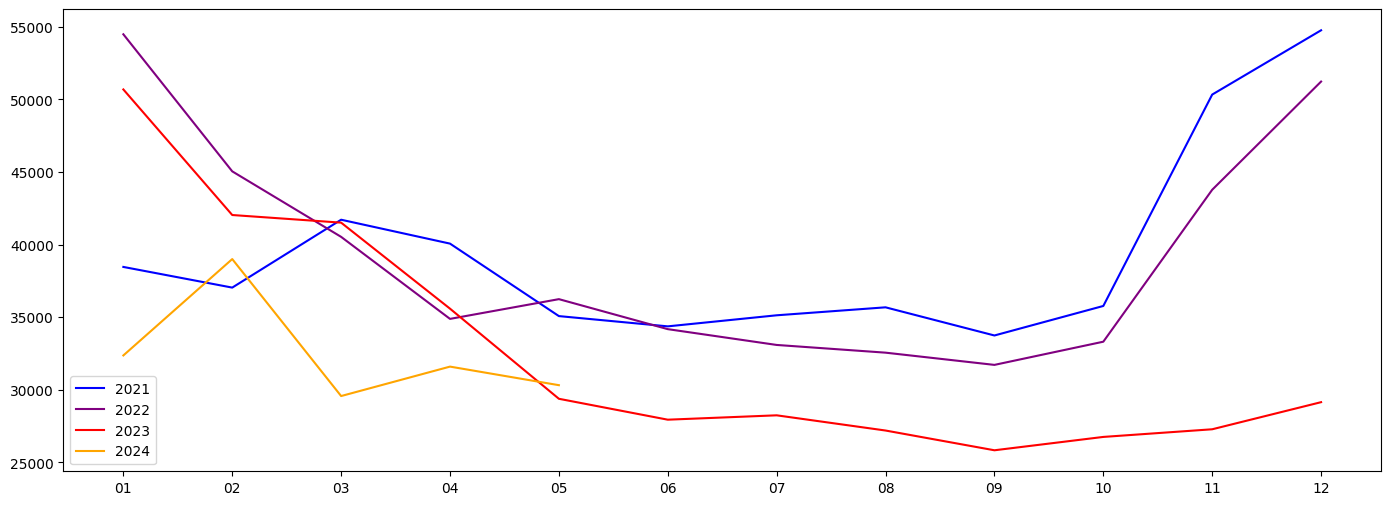

In [14]:
plt.plot(serie_temp_2_2021, color='blue', label='2021')
plt.plot(serie_temp_2_2022, color='purple', label='2022')
plt.plot(serie_temp_2_2023, color='red', label='2023')
plt.plot(serie_temp_2_2024, color='orange', label='2024')
plt.legend(loc='best')

H0 = série estacionária. valor <= valor crítico
Ha = série não estacionária. valor > valor crítico

In [15]:
kpss_test = stt.kpss(serie_temporal_2_series)
print(f'Valor do teste: {kpss_test[0]}')
print(f'P-Value: {kpss_test[1]}')
print(f'Número de lags: {kpss_test[2]}')
print('Valores críticos:')
for chave, valor in kpss_test[3].items():
    print(f'{chave}: {valor}')

if kpss_test[0] <= kpss_test[3]['5%']:
    print('Série estacionária')
else:
    print('Série não estacionária')

Valor do teste: 0.3597198860322923
P-Value: 0.09451729050332228
Número de lags: 3
Valores críticos:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739
Série estacionária


Muito estranho, considerando a visível tendência de descrescimento. Vou realizar o teste de Dickey-Fuller para se bate.

H0 = série não estacionária. valor > valor crítico
Ha = série estacionária. valor <= valor crítico

In [16]:
df_test = stt.adfuller(serie_temporal_2_series)
print(f'Valor do teste: {df_test[0]}')
print(f'P-Value: {df_test[1]}')
print(f'Número de lags: {df_test[2]}')
print('Valores críticos:')
for chave, valor in df_test[4].items():
    print(f'{chave}: {valor}')

if df_test[0] <= df_test[4]['5%']:
    print('Série estacionária')
else:
    print('Série não estacionária')

Valor do teste: -2.7903201579610797
P-Value: 0.05966982326539349
Número de lags: 1
Valores críticos:
1%: -3.610399601308181
5%: -2.939108945868946
10%: -2.6080629651545038
Série não estacionária


Resultados divergentes entre KPSS e Dickey-Fuller

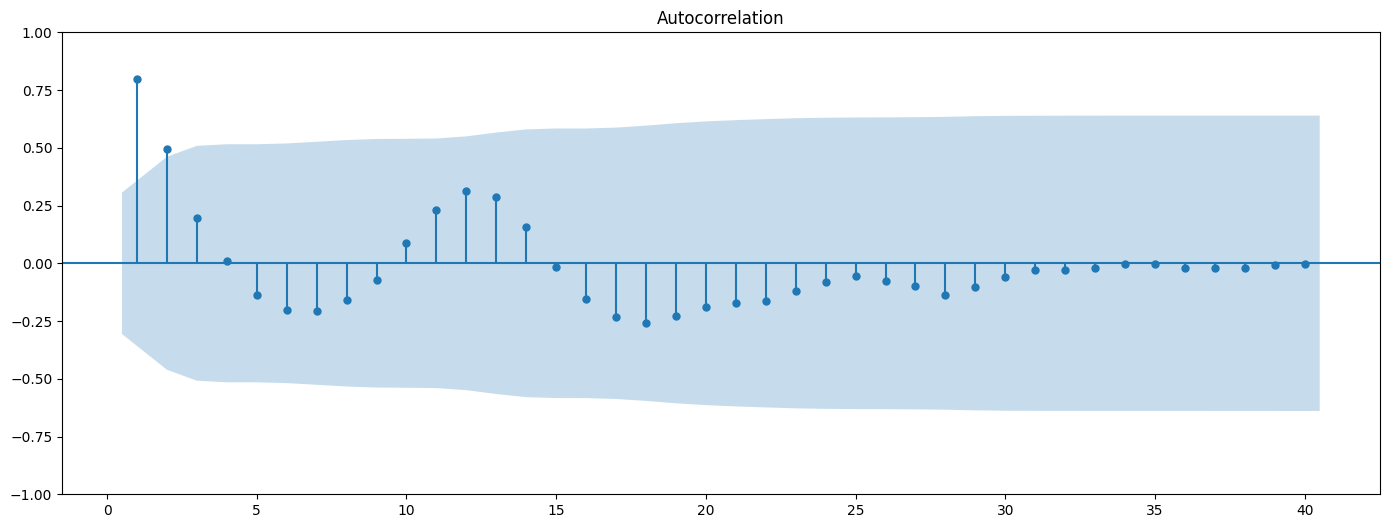

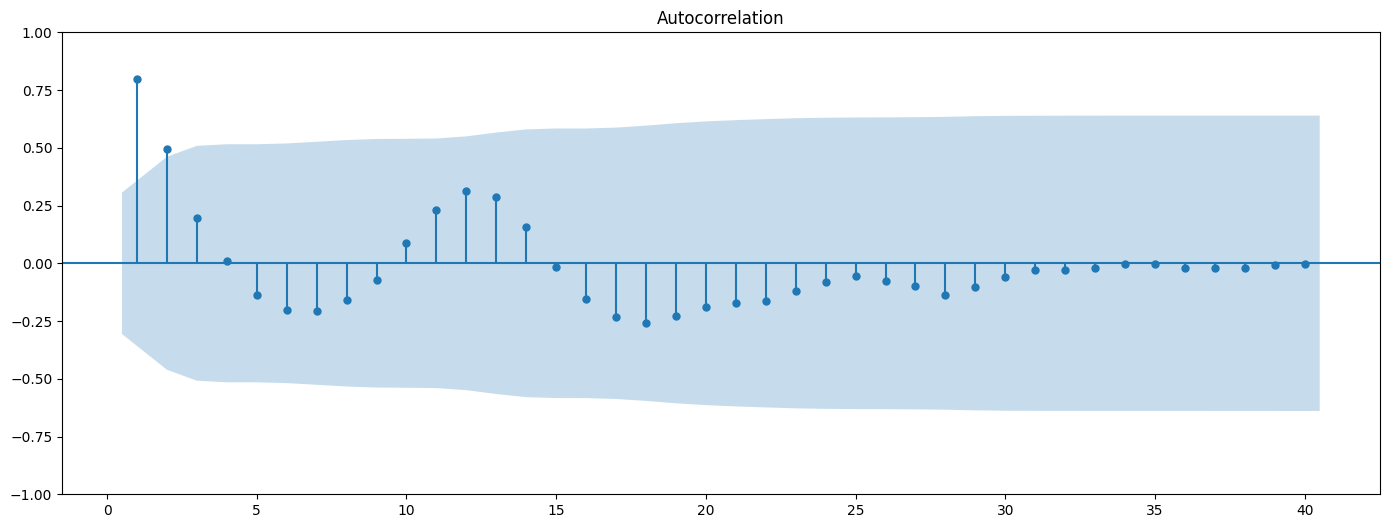

In [17]:
plot_acf(serie_temporal_2_series, alpha=0.05, zero=False, lags=40)

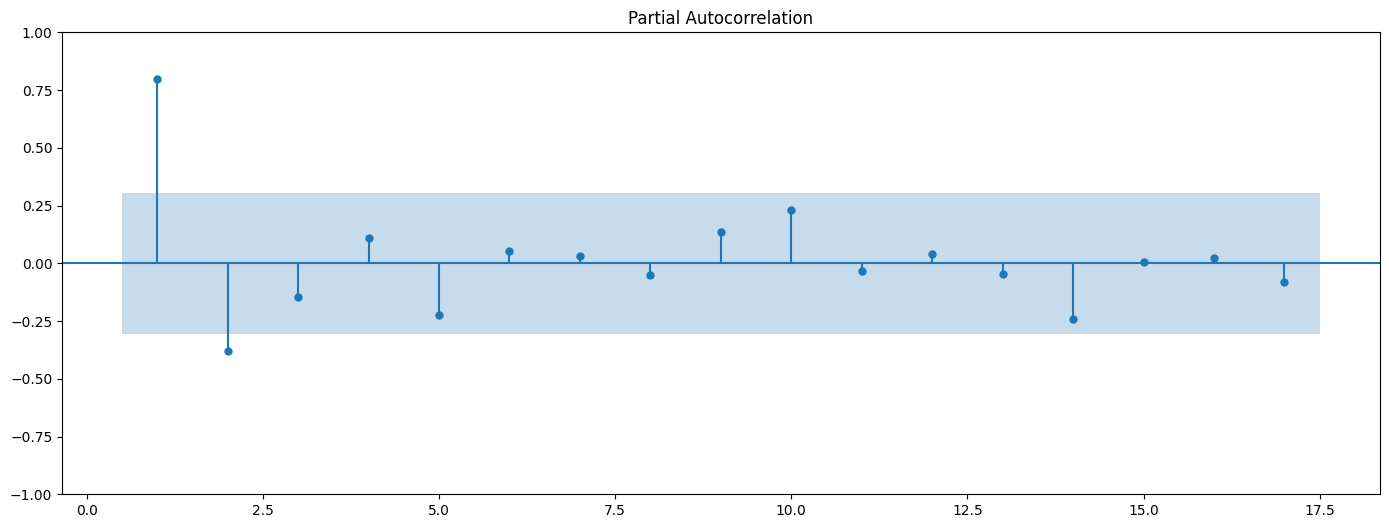

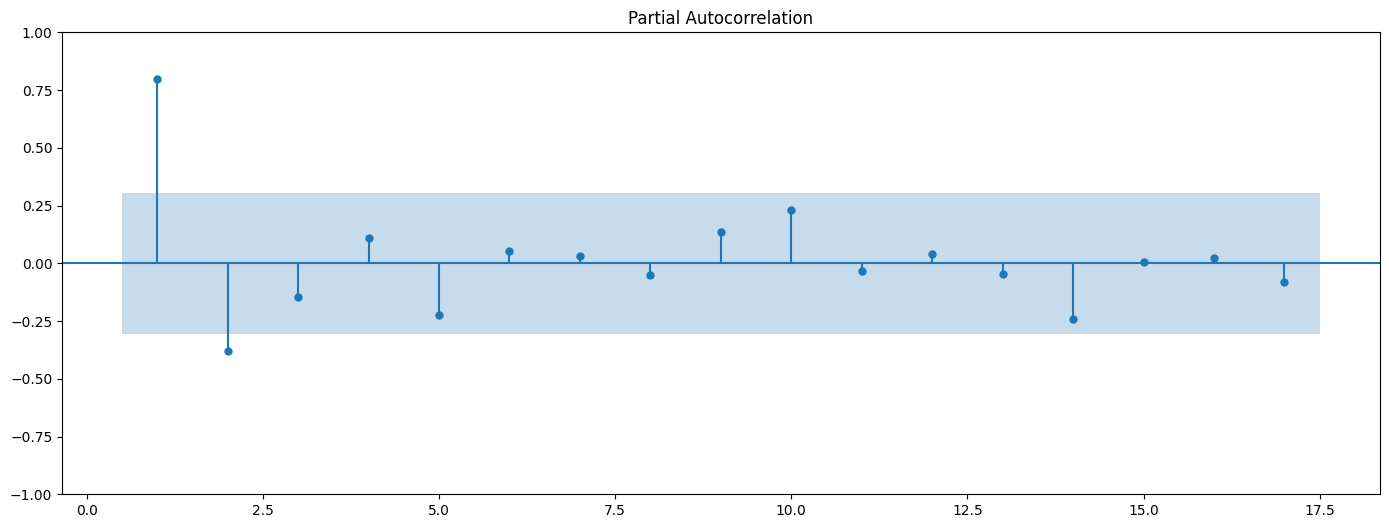

In [18]:
plot_pacf(serie_temporal_2_series, alpha=0.05, zero=False)

Não havendo qualquer autocorrelação e estacionaridade, pode ser um passeio estocástico. Contudo, não acredito que seja o caso, pois parece ser uma série facilmente previsível.

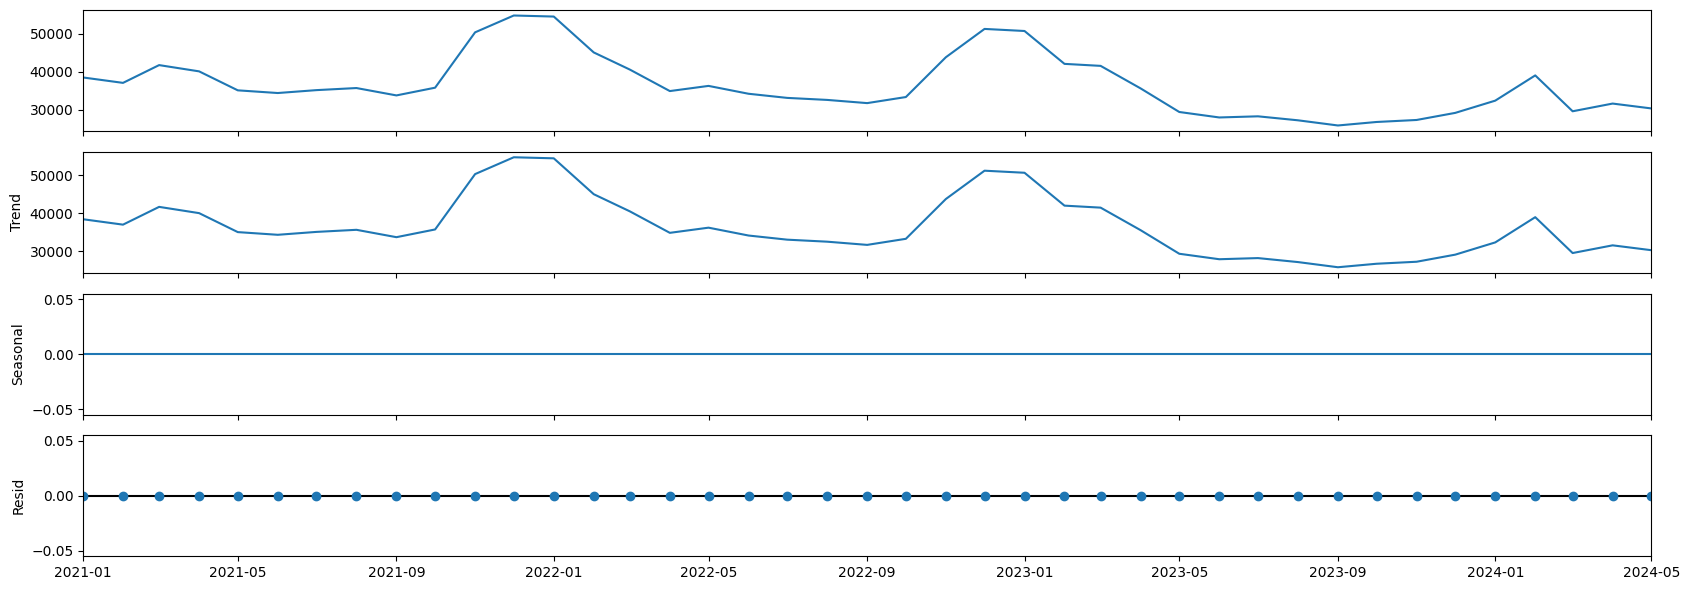

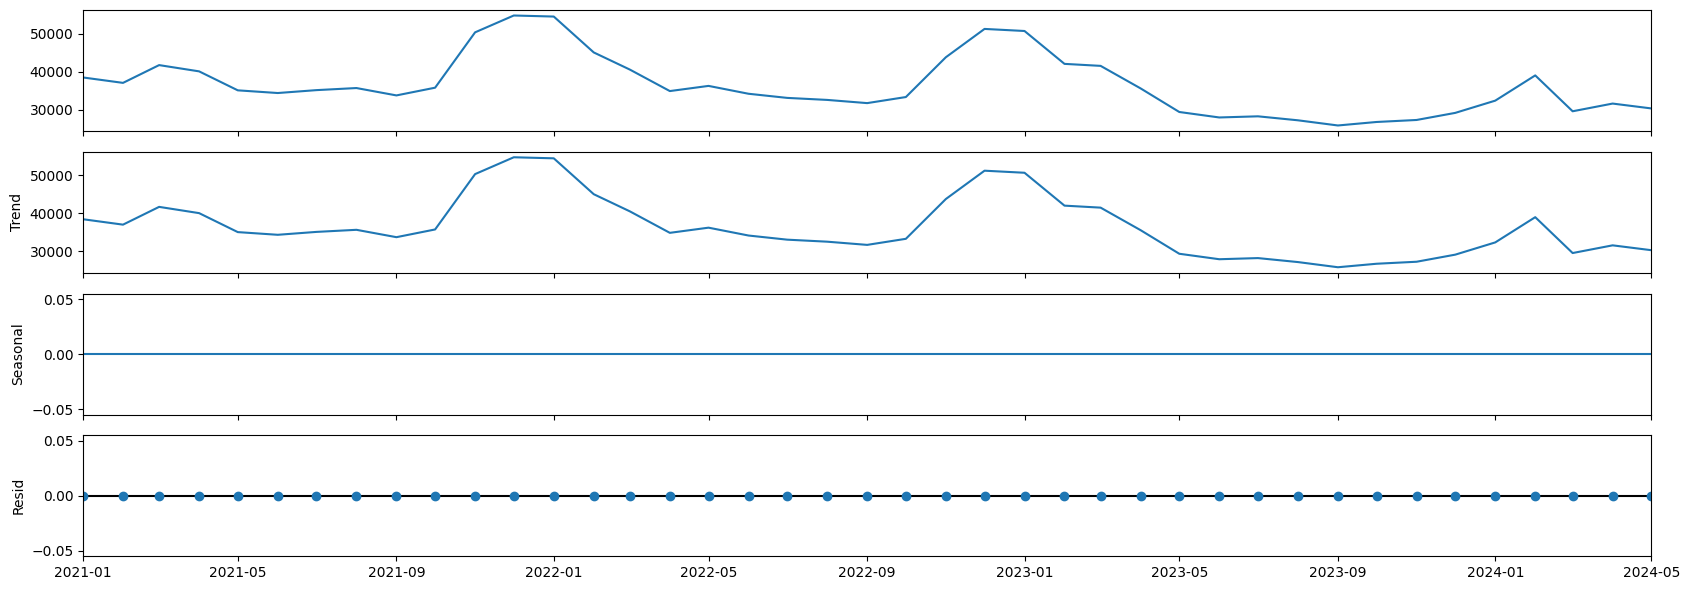

In [19]:
decomposicao_serie2 = seasonal_decompose(serie_temporal_2_series, period=1)
decomposicao_serie2.plot()

Novamente uma série não sazonal. Essa série também apresenta um ciclo de aumento explosivo no fim do ano, mas apresenta também uma tendência de queda ao longo dos anos.

In [20]:
decomposicao_serie1_21 = seasonal_decompose(serie_temp_2_2021, period=1)
decomposicao_serie1_22 = seasonal_decompose(serie_temp_2_2022, period=1)
decomposicao_serie1_23 = seasonal_decompose(serie_temp_2_2023, period=1)
decomposicao_serie1_24 = seasonal_decompose(serie_temp_2_2024, period=1)

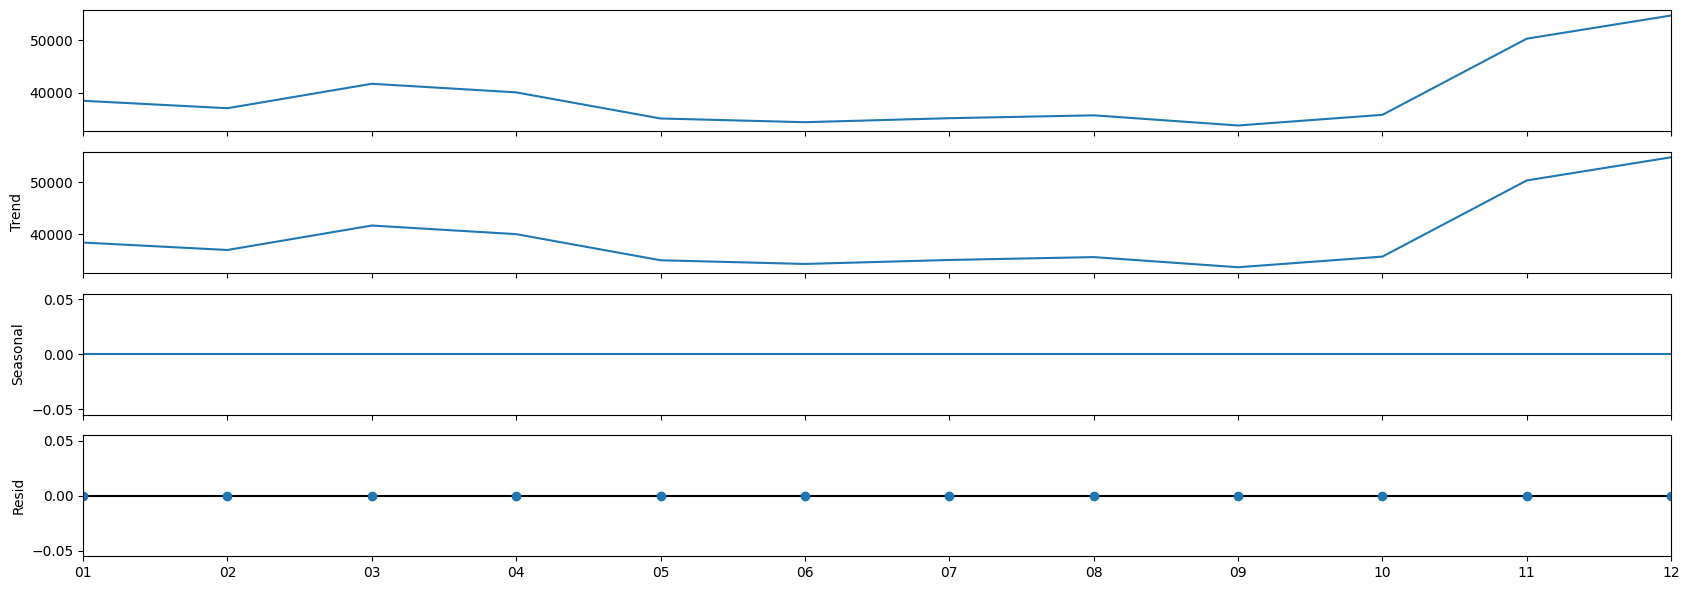

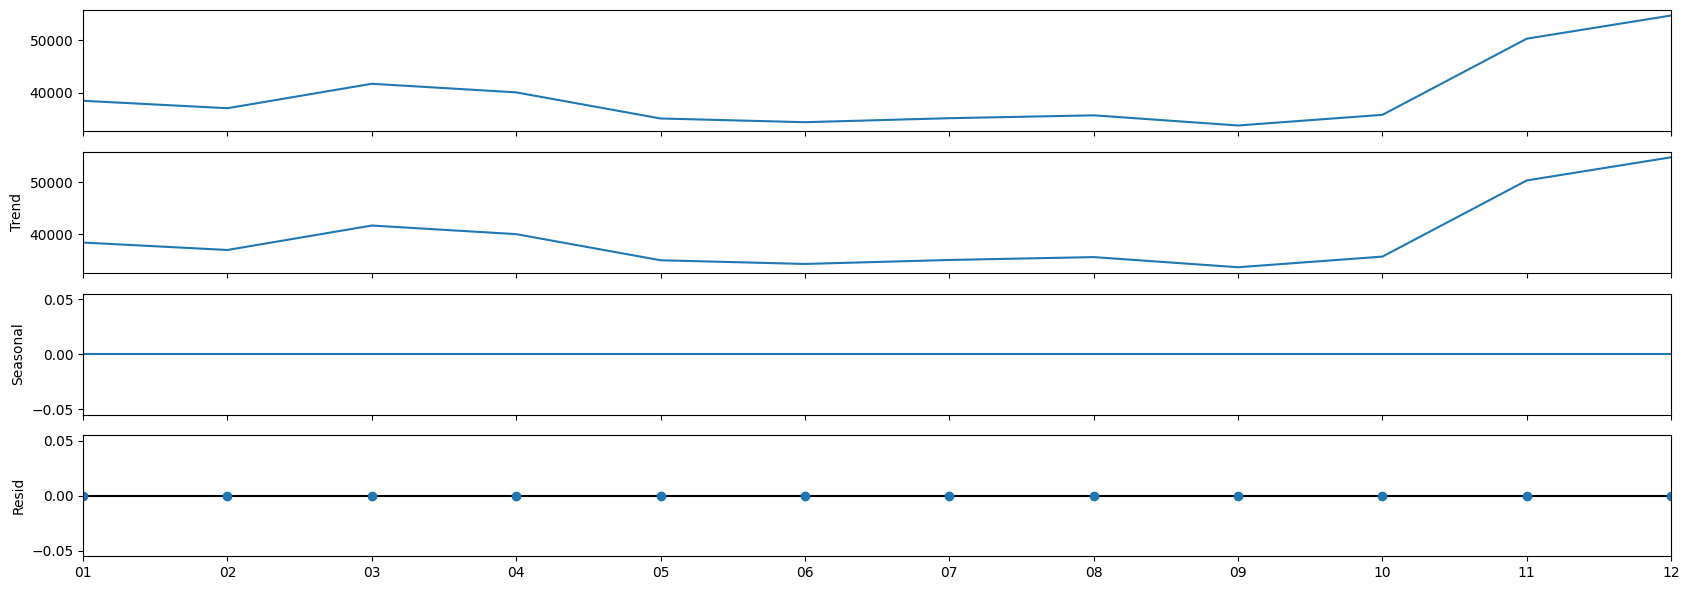

In [21]:
decomposicao_serie1_21.plot()

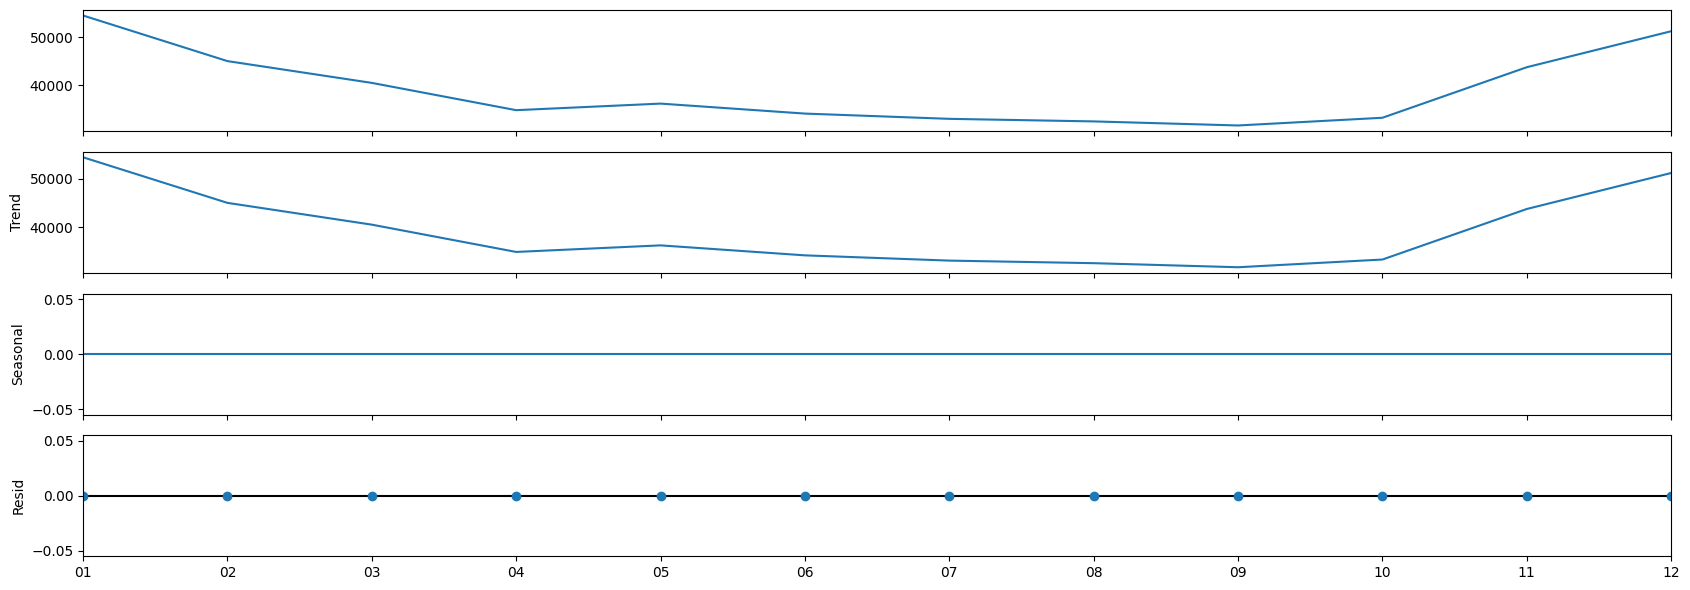

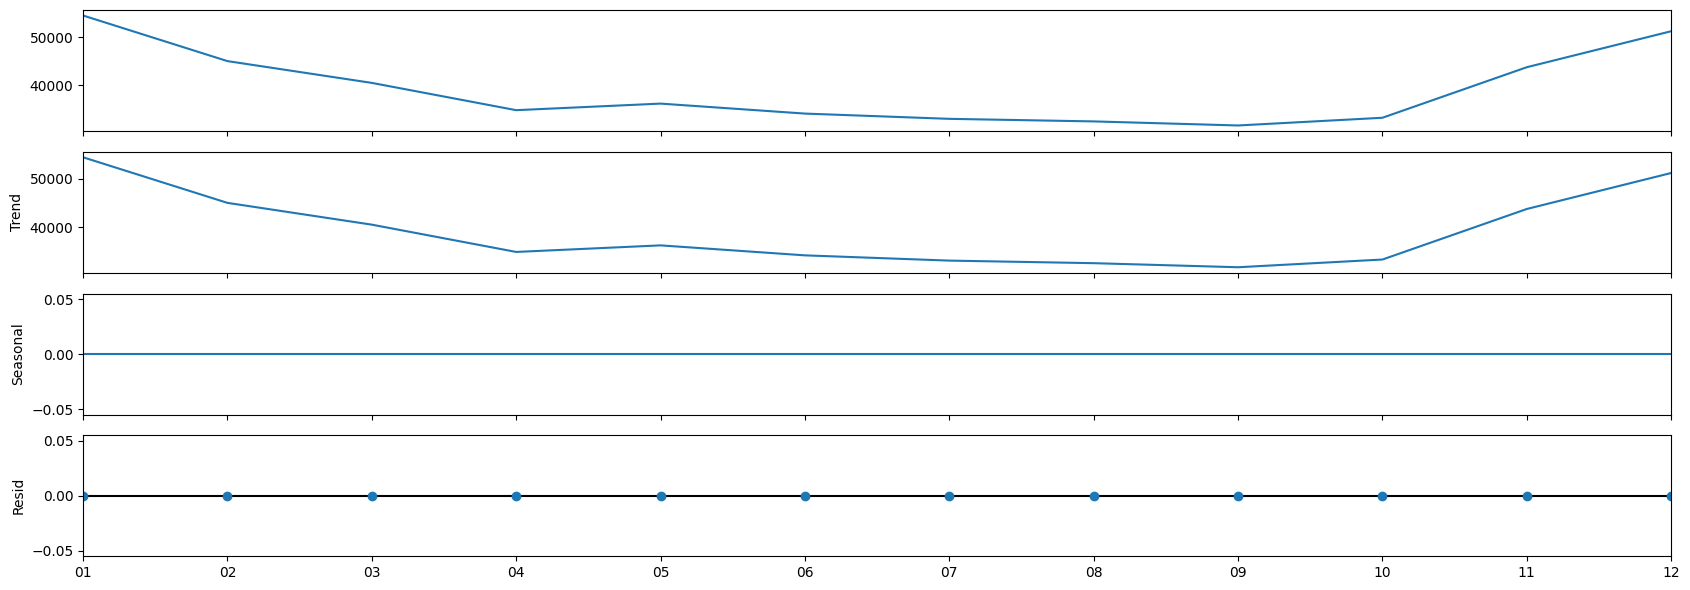

In [22]:
decomposicao_serie1_22.plot()

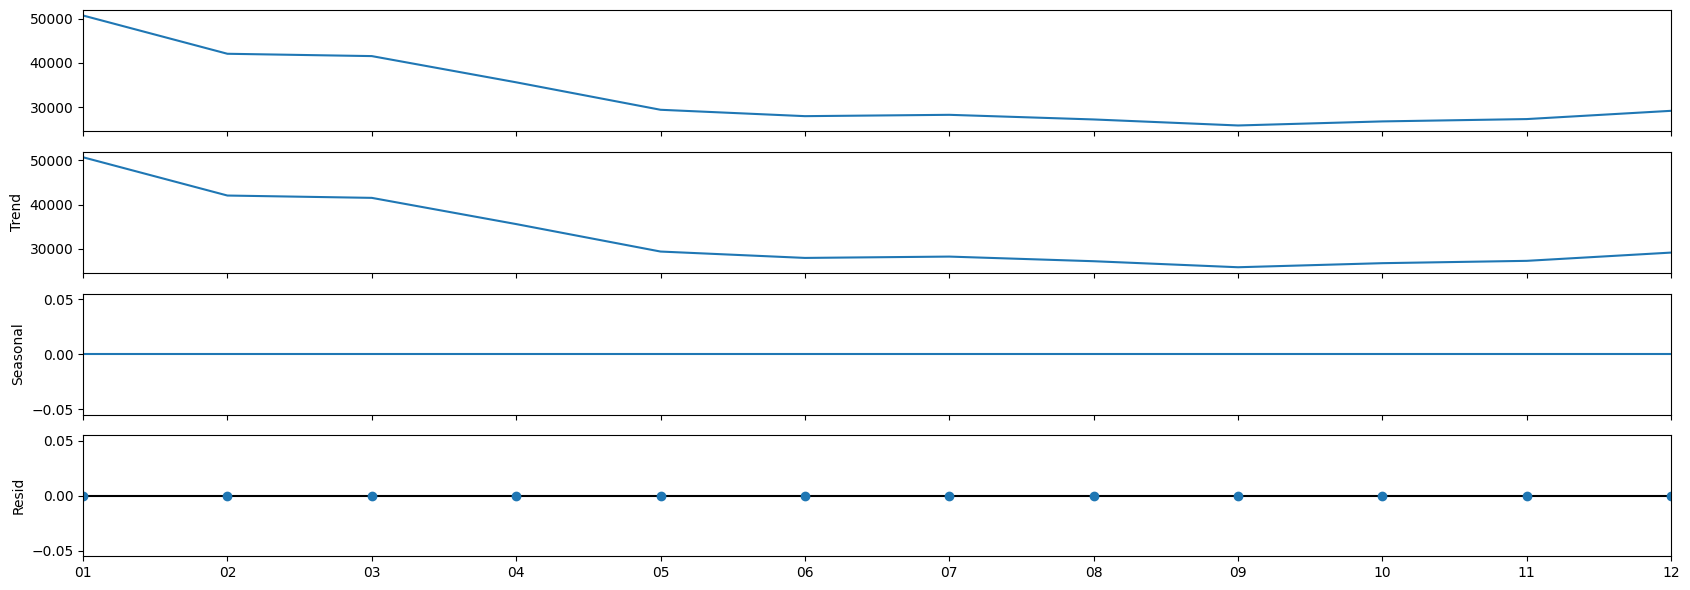

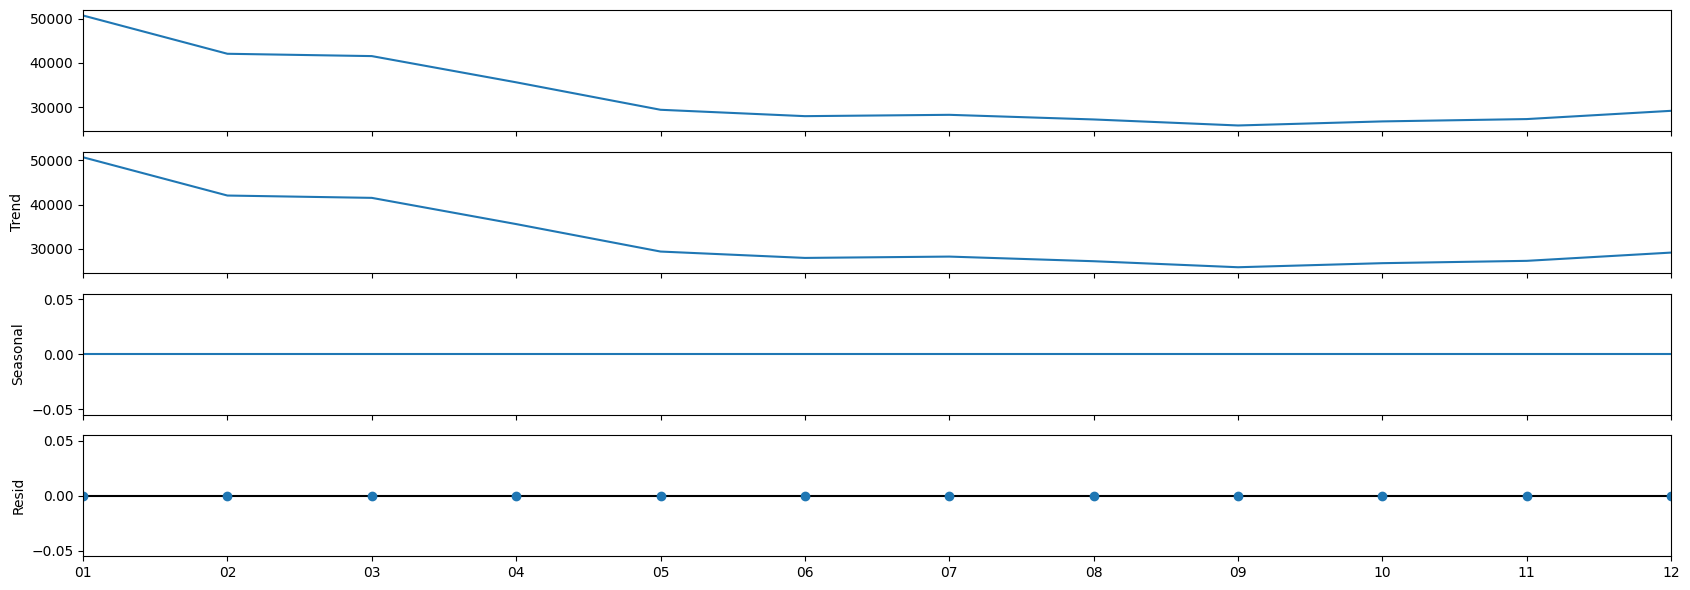

In [23]:
decomposicao_serie1_23.plot()

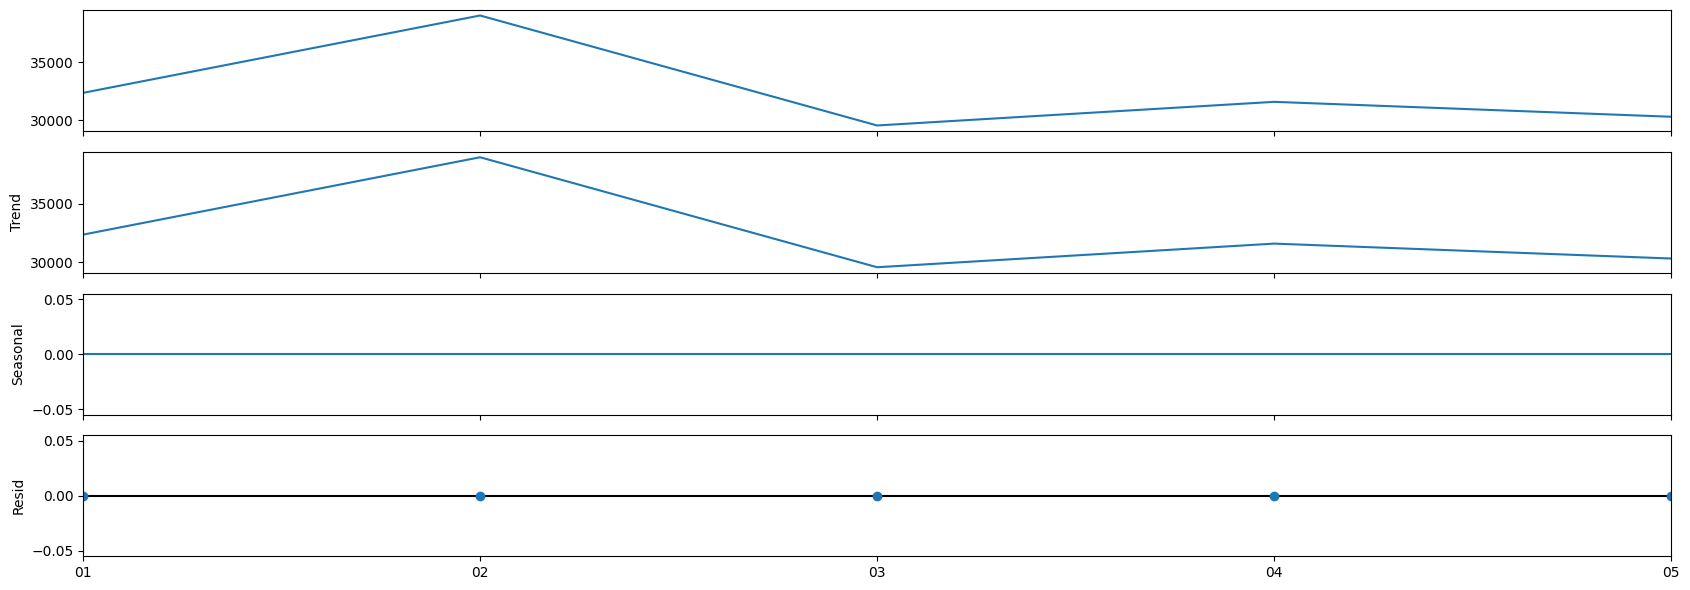

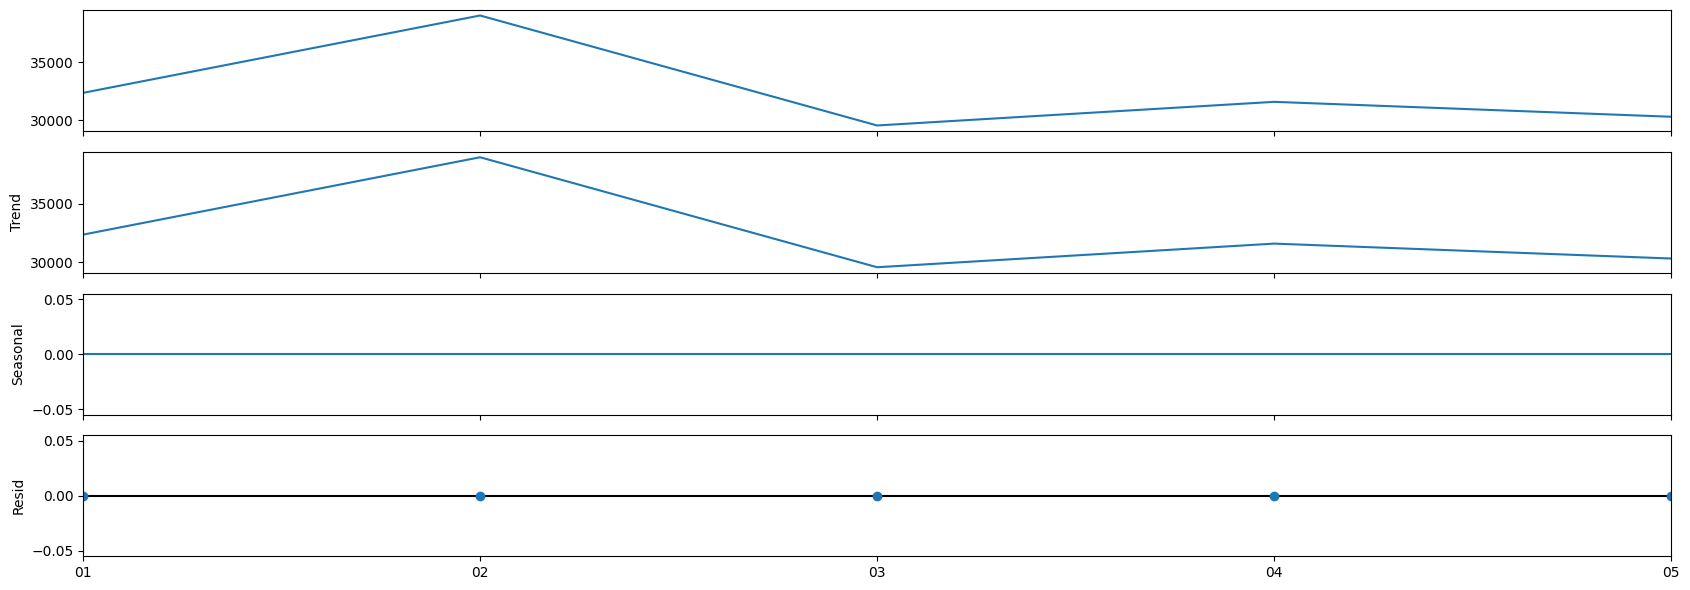

In [24]:
decomposicao_serie1_24.plot()

O ano de 2023 viola a ciclicidade geral, não apresentando crescimento explosivo no fim do ano. De forma semelhante, o ano de 2024 viola essa ciclicidade pois apresenta crescimento forte em fevereiro, algo inédito nessa série.

Caso fôssemo analisar as séries anuais individualmente, acredito que poderiam ser classificadas como séries estacionárias

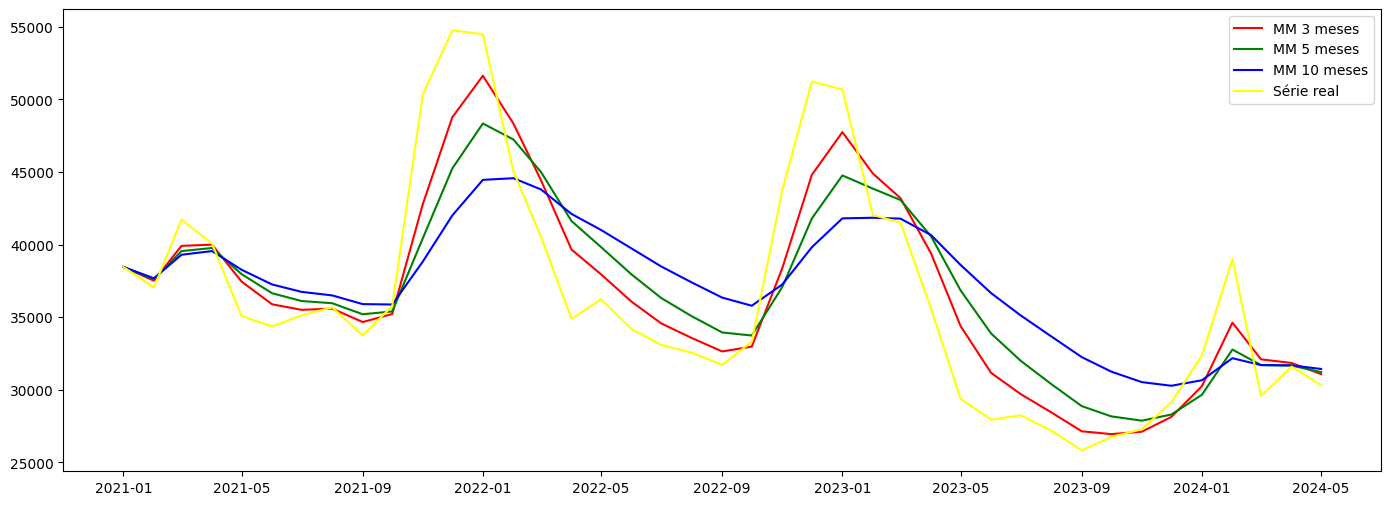

In [25]:
media_movel_curta = serie_temporal_2_series.ewm(span=3,).mean()
media_movel_mediana = serie_temporal_2_series.ewm(span=5).mean()
media_movel_longa = serie_temporal_2_series.ewm(span=10).mean()
plt.plot(media_movel_curta, color='red', label='MM 3 meses')
plt.plot(media_movel_mediana, color='green', label='MM 5 meses')
plt.plot(media_movel_longa, color='blue', label='MM 10 meses')
plt.plot(serie_temporal_2_series, color='yellow', label='Série real')
plt.legend(loc='best')

As médias móveis sustentam ainda mais a percepção anterior sobre a tendência e a ciclicidade (principalmente a de 10 meses)

((array([-2.12570479, -1.74291212, -1.51528984, -1.34678628, -1.20968671,
         -1.09219094, -0.98810906, -0.89376191, -0.80676941, -0.72549338,
         -0.64875081, -0.57565335, -0.50551158, -0.43777469, -0.37199083,
         -0.30778002, -0.24481487, -0.18280651, -0.12149384, -0.06063494,
          0.        ,  0.06063494,  0.12149384,  0.18280651,  0.24481487,
          0.30778002,  0.37199083,  0.43777469,  0.50551158,  0.57565335,
          0.64875081,  0.72549338,  0.80676941,  0.89376191,  0.98810906,
          1.09219094,  1.20968671,  1.34678628,  1.51528984,  1.74291212,
          2.12570479]),
  array([25829.4101, 26749.4618, 27190.1552, 27276.3319, 27936.8808,
         28237.9317, 29143.7524, 29377.0791, 29565.7371, 30313.9665,
         31593.5115, 31712.0887, 32363.7098, 32554.4121, 33086.0027,
         33309.799 , 33738.1695, 34174.4342, 34366.7915, 34881.4412,
         35073.5331, 35128.9696, 35585.4195, 35678.0093, 35771.7085,
         36241.4403, 37036.8864, 38460.

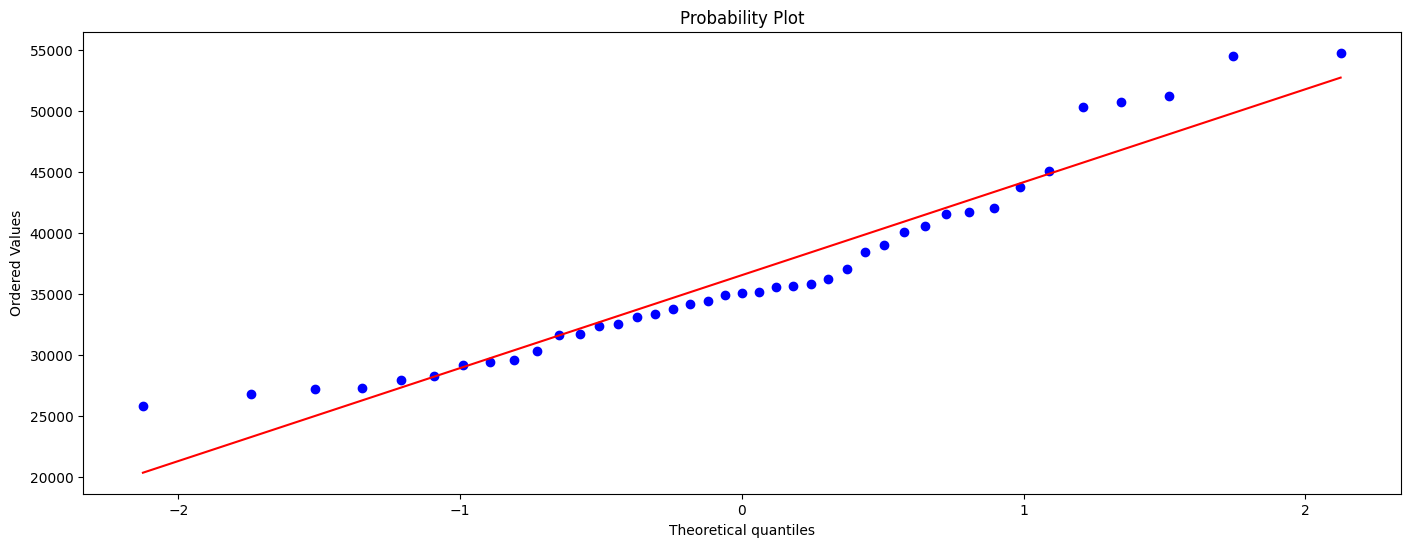

In [26]:
stats.probplot(serie_temporal_2_series, dist='norm', plot=plt)

Uma distribuição claramente não normal. Isso será um problema para a criação de um modelo.

In [27]:
test_value, p_value = stats.shapiro(serie_temporal_2_series)
print(f'Valor de teste: {test_value}')
print(f'P-value: {p_value}')

if p_value > 0.05:
    print('Distribuição normal')
else:
    print('Não é distribuição normal')

Valor de teste: 0.9202611436755552
P-value: 0.006954314054678641
Não é distribuição normal


Confirmado matematicamente.

In [28]:
serie_temporal_2_log = np.log(serie_temporal_2_series)
serie_temporal_2_raiz3 = serie_temporal_2_series ** (1/3)

In [29]:
test_value_log, p_value_log = stats.shapiro(serie_temporal_2_log)
print(f'Valor de teste: {test_value_log}')
print(f'P-value: {p_value_log}')

if p_value_log > 0.05:
    print('Distribuição normal')
else:
    print('Não é distribuição normal')

Valor de teste: 0.9584285333090651
P-value: 0.13854831815631335
Distribuição normal


((array([-2.12570479, -1.74291212, -1.51528984, -1.34678628, -1.20968671,
         -1.09219094, -0.98810906, -0.89376191, -0.80676941, -0.72549338,
         -0.64875081, -0.57565335, -0.50551158, -0.43777469, -0.37199083,
         -0.30778002, -0.24481487, -0.18280651, -0.12149384, -0.06063494,
          0.        ,  0.06063494,  0.12149384,  0.18280651,  0.24481487,
          0.30778002,  0.37199083,  0.43777469,  0.50551158,  0.57565335,
          0.64875081,  0.72549338,  0.80676941,  0.89376191,  0.98810906,
          1.09219094,  1.20968671,  1.34678628,  1.51528984,  1.74291212,
          2.12570479]),
  array([10.15926905, 10.19426963, 10.21061025, 10.21377464, 10.23770299,
         10.24842145, 10.27999584, 10.28797003, 10.29437144, 10.31936383,
         10.36070705, 10.36445323, 10.38479301, 10.39066819, 10.40686559,
         10.4136069 , 10.4263851 , 10.43923311, 10.44484601, 10.4597102 ,
         10.46520208, 10.46678141, 10.47969127, 10.48228979, 10.48491259,
         10.49

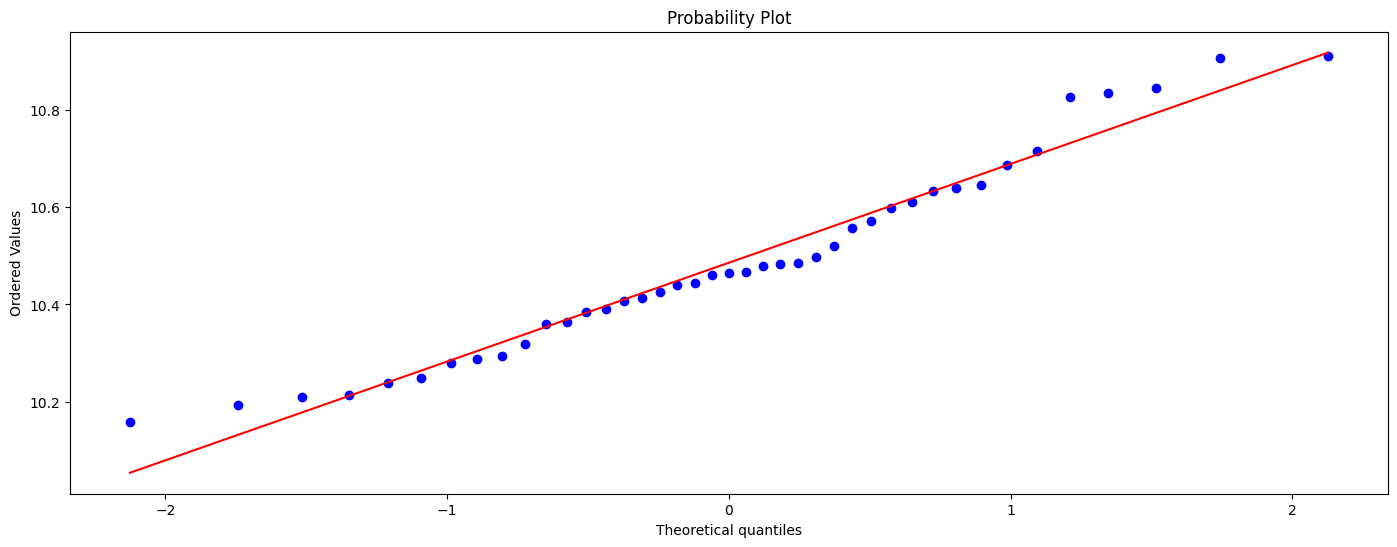

In [30]:
stats.probplot(serie_temporal_2_log, dist='norm', plot=plt)

In [31]:
test_value_raiz, p_value_raiz = stats.shapiro(serie_temporal_2_raiz3)
print(f'Valor de teste: {test_value_raiz}')
print(f'P-value: {p_value_raiz}')

if p_value_raiz > 0.05:
    print('Distribuição normal')
else:
    print('Não é distribuição normal')

Valor de teste: 0.9479088123282534
P-value: 0.059109412143217195
Distribuição normal


((array([-2.12570479, -1.74291212, -1.51528984, -1.34678628, -1.20968671,
         -1.09219094, -0.98810906, -0.89376191, -0.80676941, -0.72549338,
         -0.64875081, -0.57565335, -0.50551158, -0.43777469, -0.37199083,
         -0.30778002, -0.24481487, -0.18280651, -0.12149384, -0.06063494,
          0.        ,  0.06063494,  0.12149384,  0.18280651,  0.24481487,
          0.30778002,  0.37199083,  0.43777469,  0.50551158,  0.57565335,
          0.64875081,  0.72549338,  0.80676941,  0.89376191,  0.98810906,
          1.09219094,  1.20968671,  1.34678628,  1.51528984,  1.74291212,
          2.12570479]),
  array([29.56002719, 29.90691957, 30.07026316, 30.10199797, 30.34305504,
         30.45165923, 30.77384931, 30.8557569 , 30.92166734, 31.18034542,
         31.61301856, 31.65251932, 31.86785013, 31.93032108, 32.10318343,
         32.17540365, 32.3127439 , 32.45142541, 32.51219787, 32.67368668,
         32.73355485, 32.75079177, 32.89203143, 32.92053402, 32.94932796,
         33.09

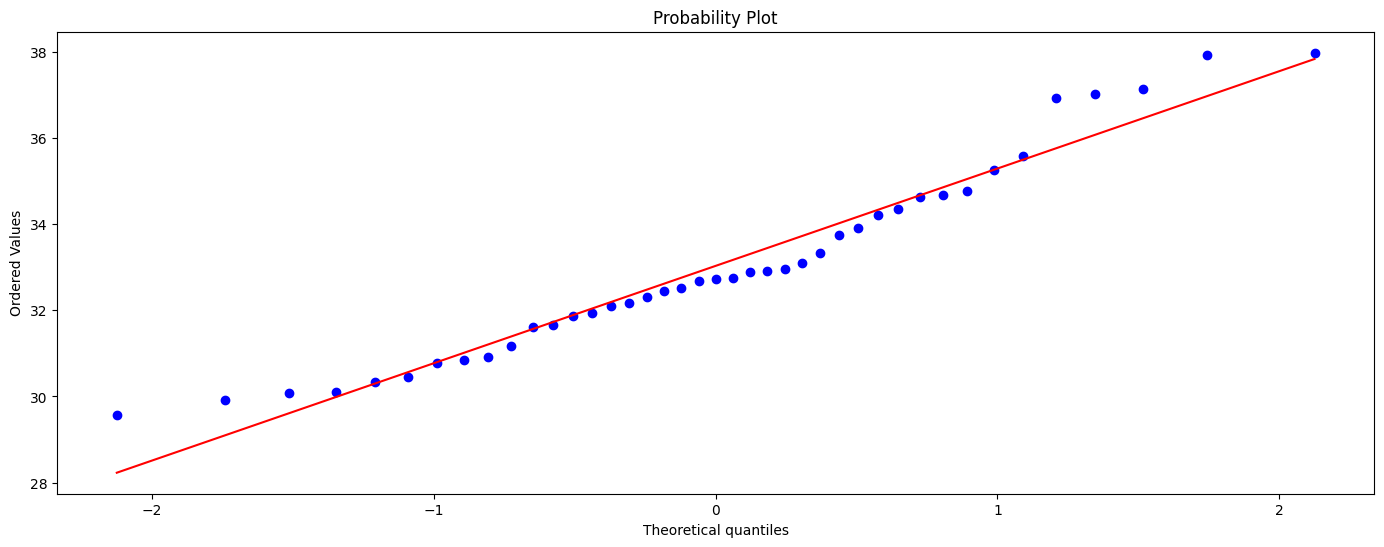

In [32]:
stats.probplot(serie_temporal_2_raiz3, dist='norm', plot=plt)

Aparentemente, a transformação log apresenta uma distribuição "mais normal". Contudo, vale ressaltar que ambas as transformações são satisfatórias para esse requisito, tanto que, graficamente, as distribuições são quase idênticas.

In [33]:
serie_log_treino = serie_temporal_2_log[0:36]
serie_log_treino

2021-01-01 00:00:00    10.557389
2021-02-01 00:00:00    10.519670
2021-03-01 00:00:00    10.638576
2021-04-01 00:00:00    10.598312
2021-05-01 00:00:00    10.465202
2021-06-01 00:00:00    10.444846
2021-07-01 00:00:00    10.466781
2021-08-01 00:00:00    10.482290
2021-09-01 00:00:00    10.426385
2021-10-01             10.484913
2021-11-01             10.826470
2021-12-01             10.910803
2022-01-01 00:00:00    10.905735
2022-02-01 00:00:00    10.715430
2022-03-01 00:00:00    10.609852
2022-04-01 00:00:00    10.459710
2022-05-01 00:00:00    10.497959
2022-06-01 00:00:00    10.439233
2022-07-01 00:00:00    10.406866
2022-08-01 00:00:00    10.390668
2022-09-01 00:00:00    10.364453
2022-10-01             10.413607
2022-11-01             10.686876
2022-12-01             10.844113
2023-01-01 00:00:00    10.833450
2023-02-01 00:00:00    10.646319
2023-03-01 00:00:00    10.633731
2023-04-01 00:00:00    10.479691
2023-05-01 00:00:00    10.287970
2023-06-01 00:00:00    10.237703
2023-07-01

In [34]:
ar_model = ARIMA(serie_log_treino, order=(2, 0, 0))
resultado_ar = ar_model.fit()
print(resultado_ar.summary())

c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(2, 0, 0)   Log Likelihood                  33.374
Date:                Tue, 24 Sep 2024   AIC                            -58.748
Time:                        20:35:15   BIC                            -52.414
Sample:                    01-01-2021   HQIC                           -56.537
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5006      0.091    115.471      0.000      10.322      10.679
ar.L1          1.2596      0.238      5.301      0.000       0.794       1.725
ar.L2         -0.5017      0.218     -2.303      0.0

Melhor AIC em(2, 0, 0): -58.748

In [35]:
residuos_ar = resultado_ar.resid
residuos_ar.describe()

count    36.000000
mean     -0.000265
std       0.095125
min      -0.119513
25%      -0.071108
50%      -0.015382
75%       0.044385
max       0.308389
dtype: float64

Média próxima de 0. Bom sinal

((array([-2.07334886, -1.68217954, -1.44830429, -1.27437681, -1.13225357,
         -1.00993636, -0.90112151, -0.80205412, -0.71029762, -0.62416759,
         -0.54243995, -0.46418751, -0.38868208, -0.31533241, -0.24364313,
         -0.17318609, -0.10357945, -0.03447167,  0.03447167,  0.10357945,
          0.17318609,  0.24364313,  0.31533241,  0.38868208,  0.46418751,
          0.54243995,  0.62416759,  0.71029762,  0.80205412,  0.90112151,
          1.00993636,  1.13225357,  1.27437681,  1.44830429,  1.68217954,
          2.07334886]),
  array([-0.11951264, -0.11551265, -0.10423452, -0.1025697 , -0.10123005,
         -0.0897149 , -0.0892702 , -0.07856315, -0.07220686, -0.07074213,
         -0.06812661, -0.06653196, -0.04470632, -0.02857275, -0.02770377,
         -0.02265618, -0.02186654, -0.01776892, -0.01299592, -0.00815801,
         -0.00641344, -0.00555783, -0.00369144,  0.01864331,  0.02934297,
          0.03784519,  0.04188088,  0.05189667,  0.05674772,  0.06521794,
          0.06

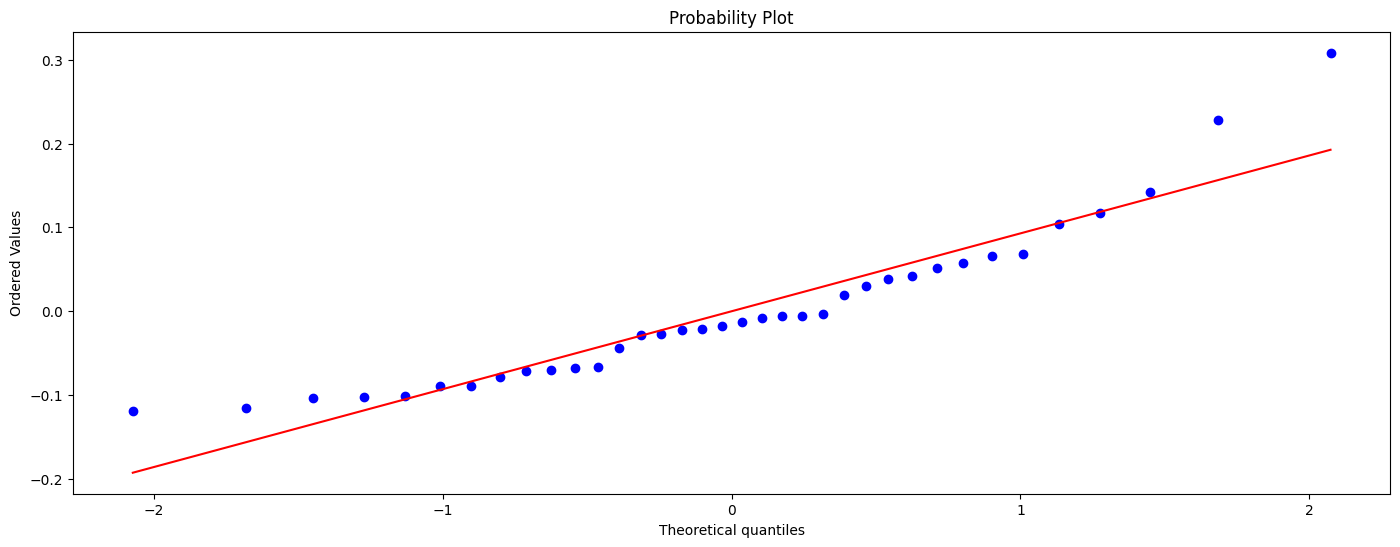

In [36]:
stats.probplot(residuos_ar, dist='norm', plot=plt)

In [37]:
test_value_ar, p_value_ar = stats.shapiro(residuos_ar)
print(f'Valor de teste: {test_value_ar}')
print(f'P-value: {p_value_ar}')

if p_value_ar > 0.05:
    print('Distribuição normal')
else:
    print('Não é distribuição normal')

Valor de teste: 0.8977507254077584
P-value: 0.0029633288651886537
Não é distribuição normal


Péssimo sinal. Dar preferência aos outros modelos.

In [38]:
ma_model = ARIMA(serie_log_treino, order=(0, 0, 3))
resultado_ma = ma_model.fit()
print(resultado_ma.summary())

c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(0, 0, 3)   Log Likelihood                  32.840
Date:                Tue, 24 Sep 2024   AIC                            -55.681
Time:                        20:35:19   BIC                            -47.763
Sample:                    01-01-2021   HQIC                           -52.917
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5014      0.068    153.473      0.000      10.367      10.635
ma.L1          1.3253      0.230      5.750      0.000       0.874       1.777
ma.L2          1.0015      0.308      3.251      0.0

Melhor AIC encontrado em (0, 0, 3): -55.681

In [39]:
residuos_ma = resultado_ma.resid
residuos_ma.describe()

count    36.000000
mean     -0.001207
std       0.096566
min      -0.140313
25%      -0.067086
50%      -0.014786
75%       0.051896
max       0.294010
dtype: float64

((array([-2.07334886, -1.68217954, -1.44830429, -1.27437681, -1.13225357,
         -1.00993636, -0.90112151, -0.80205412, -0.71029762, -0.62416759,
         -0.54243995, -0.46418751, -0.38868208, -0.31533241, -0.24364313,
         -0.17318609, -0.10357945, -0.03447167,  0.03447167,  0.10357945,
          0.17318609,  0.24364313,  0.31533241,  0.38868208,  0.46418751,
          0.54243995,  0.62416759,  0.71029762,  0.80205412,  0.90112151,
          1.00993636,  1.13225357,  1.27437681,  1.44830429,  1.68217954,
          2.07334886]),
  array([-1.40313419e-01, -1.22924854e-01, -1.15080097e-01, -1.10689430e-01,
         -1.07815488e-01, -1.03760825e-01, -9.10462194e-02, -7.88312597e-02,
         -7.25738345e-02, -6.52571380e-02, -6.47592214e-02, -5.95972646e-02,
         -4.32870704e-02, -3.26604187e-02, -2.43578223e-02, -2.16379551e-02,
         -1.89380816e-02, -1.68005885e-02, -1.27717255e-02, -8.26992560e-03,
         -5.18624968e-03, -1.24231005e-03, -6.34283528e-05,  5.16005524e-

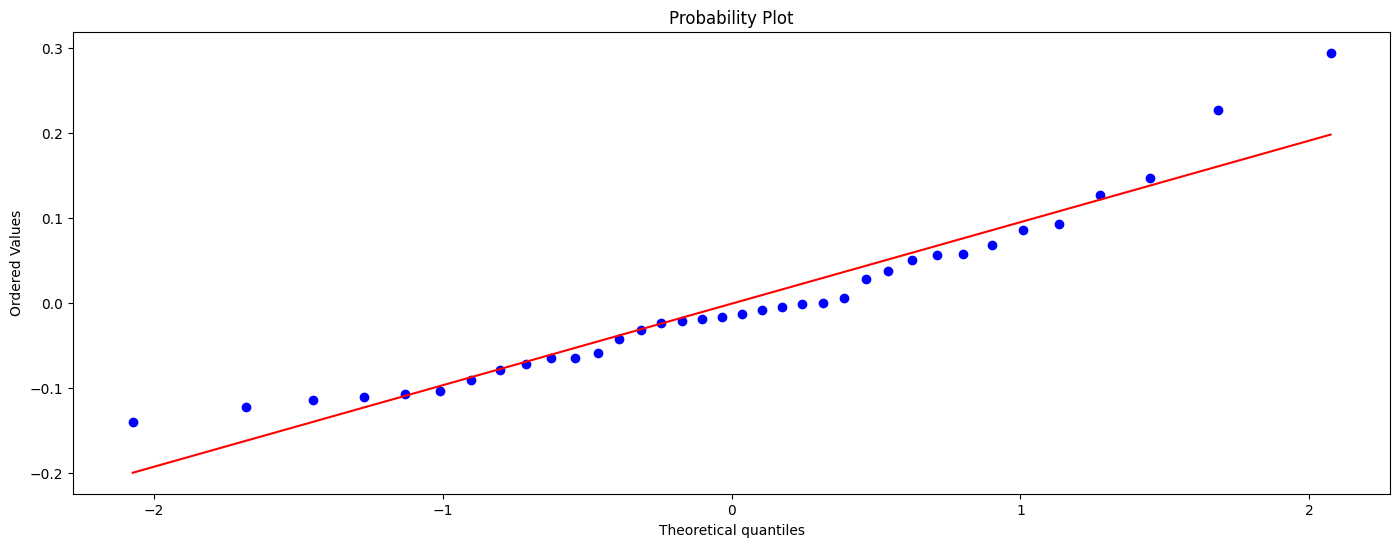

In [40]:
stats.probplot(residuos_ma, dist='norm', plot=plt)

In [41]:
test_value_ma, p_value_ma = stats.shapiro(residuos_ma)
print(f'Valor de teste: {test_value_ma}')
print(f'P-value: {p_value_ma}')

if p_value_ma > 0.05:
    print('Distribuição normal')
else:
    print('Não é distribuição normal')

Valor de teste: 0.9258916801813475
P-value: 0.018820736822270402
Não é distribuição normal


Péssimo sinal. Dar preferência aos outros modelos.

In [42]:
arma_model = ARIMA(serie_log_treino, order=(1, 0, 2))
resultado_arma = arma_model.fit()
print(resultado_arma.summary())

c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36
Model:                 ARIMA(1, 0, 2)   Log Likelihood                  33.685
Date:                Tue, 24 Sep 2024   AIC                            -57.369
Time:                        20:35:23   BIC                            -49.451
Sample:                    01-01-2021   HQIC                           -54.606
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4998      0.092    114.430      0.000      10.320      10.680
ar.L1          0.5173      0.283      1.829      0.067      -0.037       1.072
ma.L1          0.8369      0.302      2.770      0.0

Melhor AIC em (1, 0, 2): -57.369

((array([-2.07334886, -1.68217954, -1.44830429, -1.27437681, -1.13225357,
         -1.00993636, -0.90112151, -0.80205412, -0.71029762, -0.62416759,
         -0.54243995, -0.46418751, -0.38868208, -0.31533241, -0.24364313,
         -0.17318609, -0.10357945, -0.03447167,  0.03447167,  0.10357945,
          0.17318609,  0.24364313,  0.31533241,  0.38868208,  0.46418751,
          0.54243995,  0.62416759,  0.71029762,  0.80205412,  0.90112151,
          1.00993636,  1.13225357,  1.27437681,  1.44830429,  1.68217954,
          2.07334886]),
  array([-1.44892398e-01, -1.25649953e-01, -1.05943484e-01, -9.32462430e-02,
         -8.28343202e-02, -8.01804737e-02, -7.68661661e-02, -7.41374870e-02,
         -7.39080454e-02, -6.86467312e-02, -6.81693689e-02, -5.94181471e-02,
         -5.01029684e-02, -4.46929380e-02, -3.92282069e-02, -2.79059701e-02,
         -2.36358695e-02, -2.36010607e-02, -2.06945441e-02, -1.05457088e-02,
         -8.55745257e-04, -7.82091576e-05,  3.35405026e-03,  1.92638477e-

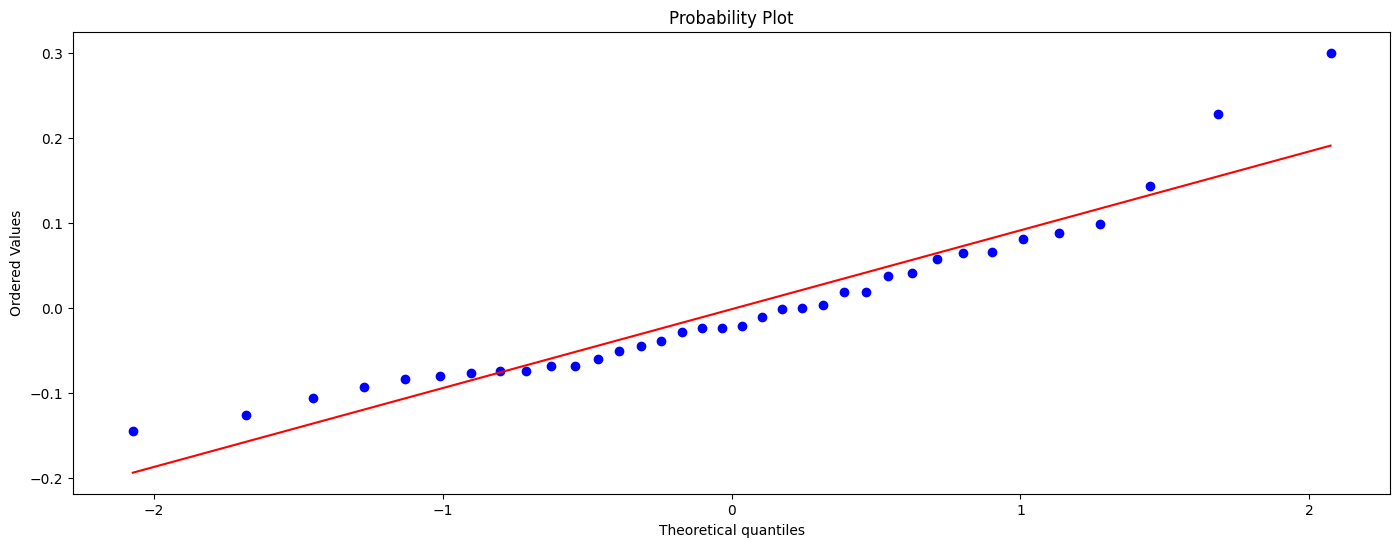

In [43]:
residuos_arma = resultado_arma.resid
stats.probplot(residuos_arma, dist='norm', plot=plt)

Parece um pouquinho melhor

In [44]:
test_value_arma, p_value_arma = stats.shapiro(residuos_arma)
print(f'Valor de teste: {test_value_arma}')
print(f'P-value: {p_value_arma}')

if p_value_arma > 0.05:
    print('Distribuição normal')
else:
    print('Não é distribuição normal')

Valor de teste: 0.912421331095689
P-value: 0.007592000933559099
Não é distribuição normal


Apesar de tudo, parece estar um pouco melhor

In [45]:
auto_arima_model = auto_arima(serie_log_treino, trace=True, stepwise=False, seasonal=False, max_p=10, max_q=10, start_p=0, start_q=0)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=273.473, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=1.67 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=2.60 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=5.98 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=inf, Time=10.21 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=inf, Time=11.56 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-45.268, Time=2.90 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-44.034, Time=3.63 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-44.784, Time=6.05 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=7.92 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=3.37 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-43.599, Time=4.38 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-43.579, Time=9.43 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-41.382, Time=7.54 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=3.8

In [46]:
auto_arima_model2 = auto_arima(serie_log_treino, trace=True, stepwise=False, seasonal=True, max_p=10, max_q=10, start_p=0, start_q=0)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=-8.270, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=-36.175, Time=1.29 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=-54.799, Time=3.44 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=-55.681, Time=5.69 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=8.45 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=12.45 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=-50.352, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=-55.970, Time=5.77 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=-57.333, Time=6.70 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=-55.634, Time=8.94 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=-54.099, Time=11.21 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=-58.741, Time=2.44 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=-56.754, Time=8.11 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=-55.766, Time=9.21 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=-53.368, Time=8.77 sec
 ARIMA(3,0,0)(0,0,0)[1] intercep

In [47]:
resultado_auto_arima1 = auto_arima_model.fit(serie_log_treino)

In [48]:
resultado_auto_arima2 = auto_arima_model2.fit(serie_log_treino)

In [49]:
predict_ar = resultado_ar.predict(36, end=40)
predict_ma = resultado_ma.predict(36, end=40)
predict_arma = resultado_arma.predict(36, end=40)
predict_auto1 = resultado_auto_arima1.predict(n_periods=5)
predict_auto2 = resultado_auto_arima2.predict(n_periods=5)
predict_auto2

2024-01-01    10.364855
2024-02-01    10.439031
2024-03-01    10.490422
2024-04-01    10.518361
2024-05-01    10.528035
Freq: MS, dtype: float64

In [50]:
predict = serie_temporal_2_series[36:41]
predict

2024-01-01 00:00:00    32363.7098
2024-02-01 00:00:00    39002.0652
2024-03-01 00:00:00    29565.7371
2024-04-01 00:00:00    31593.5115
2024-05-01 00:00:00    30313.9665
dtype: float64

In [51]:
predict_ar = np.e**predict_ar
predict_ar

2024-01-01    31780.931934
2024-02-01    34286.872471
2024-03-01    36122.145206
2024-04-01    37133.253578
2024-05-01    37454.549405
Freq: MS, Name: predicted_mean, dtype: float64

In [52]:
predict_ma = np.e**predict_ma
predict_ma

2024-01-01    32048.017634
2024-02-01    35207.850069
2024-03-01    36316.331075
2024-04-01    36365.668963
2024-05-01    36365.668963
Freq: MS, Name: predicted_mean, dtype: float64

In [53]:
predict_arma = np.e**predict_arma
predict_arma

2024-01-01    31368.162524
2024-02-01    33714.016957
2024-03-01    34941.684479
2024-04-01    35594.215512
2024-05-01    35936.546156
Freq: MS, Name: predicted_mean, dtype: float64

In [54]:
predict_auto1 = np.e**predict_auto1
predict_auto1

2024-01-01    29872.920544
2024-02-01    29843.529243
2024-03-01    29814.169663
2024-04-01    29784.841767
2024-05-01    29755.545518
Freq: MS, dtype: float64

In [55]:
predict_auto2 = np.e**predict_auto2
predict_auto2

2024-01-01    31724.847032
2024-02-01    34167.523793
2024-03-01    35969.336924
2024-04-01    36988.458824
2024-05-01    37348.026845
Freq: MS, dtype: float64

In [56]:
serie_temporal_2_series

2021-01-01 00:00:00    38460.5665
2021-02-01 00:00:00    37036.8864
2021-03-01 00:00:00    41713.3178
2021-04-01 00:00:00    40067.1373
2021-05-01 00:00:00    35073.5331
2021-06-01 00:00:00    34366.7915
2021-07-01 00:00:00    35128.9696
2021-08-01 00:00:00    35678.0093
2021-09-01 00:00:00    33738.1695
2021-10-01             35771.7085
2021-11-01             50335.7193
2021-12-01             54764.8243
2022-01-01 00:00:00    54487.9410
2022-02-01 00:00:00    45045.5707
2022-03-01 00:00:00    40532.1935
2022-04-01 00:00:00    34881.4412
2022-05-01 00:00:00    36241.4403
2022-06-01 00:00:00    34174.4342
2022-07-01 00:00:00    33086.0027
2022-08-01 00:00:00    32554.4121
2022-09-01 00:00:00    31712.0887
2022-10-01             33309.7990
2022-11-01             43777.5345
2022-12-01             51231.6494
2023-01-01 00:00:00    50688.2735
2023-02-01 00:00:00    42037.5662
2023-03-01 00:00:00    41511.7345
2023-04-01 00:00:00    35585.4195
2023-05-01 00:00:00    29377.0791
2023-06-01 00:

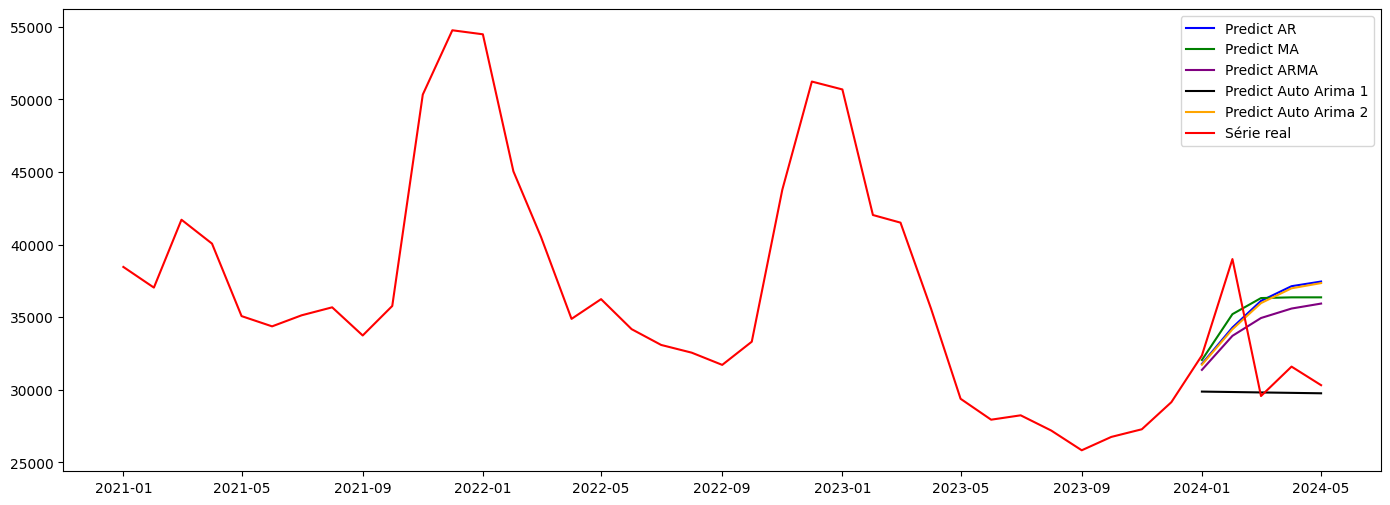

In [66]:
plt.plot(predict_ar, color='blue', label='Predict AR')
plt.plot(predict_ma, color='green', label='Predict MA')
plt.plot(predict_arma, color='purple', label='Predict ARMA')
plt.plot(predict_auto1, color='black', label='Predict Auto Arima 1')
plt.plot(predict_auto2, color='orange', label='Predict Auto Arima 2')
plt.plot(serie_temporal_2_series, color='red', label='Série real')
plt.legend(loc='best')